In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import pandas as pd

In [8]:
data_competition= pd.read_csv('/kaggle/input/ml2-competition/data.csv')
data_competition.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ID=data_competition['ID']

In [10]:
data_competition= data_competition.drop(['ID'], axis=1)

In [11]:
data_competition= preprocessing.normalize(data_competition, axis=0)
type(data_competition)

numpy.ndarray

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#scaler = StandardScaler()


data_scaled = scaler.fit_transform(data_competition)


In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
data_reduced = tsne.fit_transform(data_scaled)


In [15]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=0)  # Choose the number of components as needed
reduced_data = pca.fit_transform(data_scaled)

# Apply K-Means Clustering on the reduced-dimensional data
kmeans = KMeans(n_clusters=12)  # Change the number of clusters as needed

labels= kmeans.fit_predict(reduced_data)

# Now you have your cluster labels in 'cluster_labels'
# You can further analyze your clusters or visualize them as needed


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


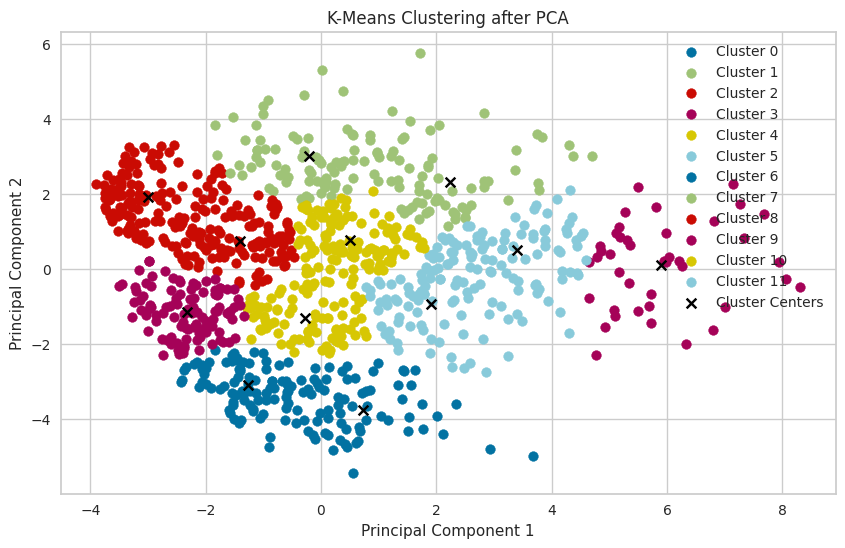

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for cluster in range(kmeans.n_clusters):
    cluster_data = reduced_data[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers')

plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


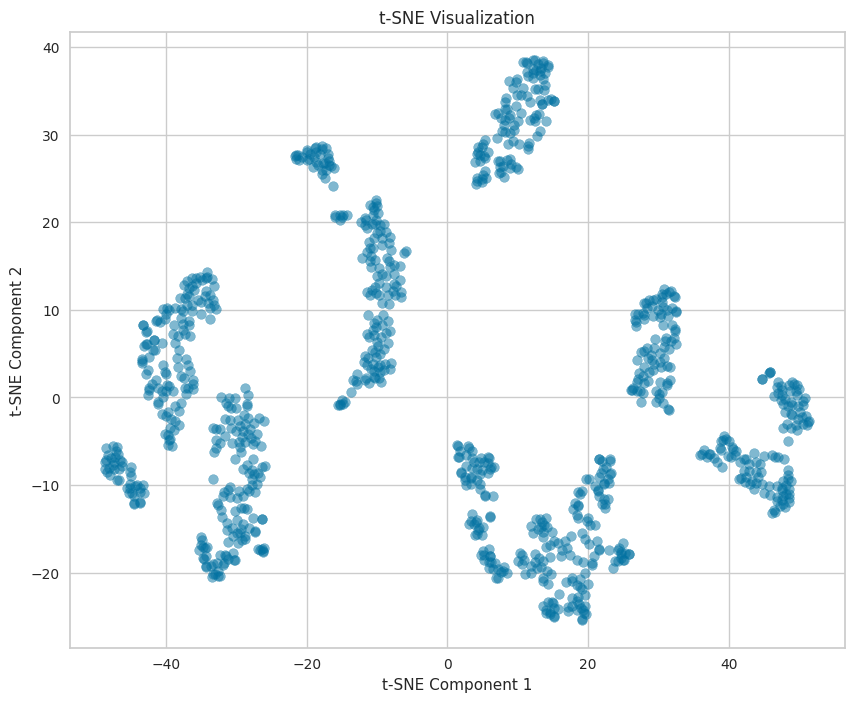

In [17]:
from sklearn.manifold import TSNE


tsne_data = tsne.fit_transform(data_reduced)  # Assuming you've already normalized your data

tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE Component 1', 't-SNE Component 2'])

plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['t-SNE Component 1'], tsne_df['t-SNE Component 2'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [18]:
k = 12 
kmeans_tsne =KMeans(init='k-means++', n_clusters=k, n_init=60)
kmeans_tsne.fit(data_reduced)

'''********************************'''
labels = kmeans_tsne.predict(data_reduced)

centroids_tsne = kmeans_tsne.cluster_centers_

print("Centroids:")
print(centroids_tsne)

print("Cluster Labels:")
print(labels)


Centroids:
[[  4.342046   26.252724 ]
 [-25.38351    -3.1692052]
 [ 31.31291     3.1961904]
 [ -3.7488341 -23.458605 ]
 [ 36.480484   24.116661 ]
 [ -1.2980415  11.382218 ]
 [-22.797169  -21.227413 ]
 [-38.657516    3.299767 ]
 [ 16.593779  -11.845848 ]
 [ -5.9733744  -4.95525  ]
 [-38.45021   -14.606743 ]
 [ 16.581184   16.494999 ]]
Cluster Labels:
[ 3  4  9  7  4  4  1  0 11 11  5  6  9  0 11  9  8  4  6  0  5  4  8  4
  8  0  2  6  6 10  5  7 10  6  1  9  0  9  9 10  5  9  7  1  9  2  0  1
  6 10  1  0  9  7  4  9  9  0  6  9  9  3  3  4  2  5  7  0  9 11 11  1
  2  8  2 10  1  9  7  9  3 10  5  1  8  1  6  0 10  7  0  2  1  2  8  6
  9  8  4 11  6  8  6  1  6  5  9  0  4  2  4  4  8  7  4  7  6  3  9  0
 10  6 10  2  3 11  6  2 11  4  7  1  3 11  9  9  1  0 10  5  9  4  5  6
  3 10  4  3  6  4  0  3  9  4  9  0  6  4  1  2  2  1  3 10  2  1  5  0
  7  8  6  5  3  1  3  5  0  5  8  0  6  0  9  4  6  9 11 10  4  2  9  1
  1  4 11  4  4  1  0  8  4 11  2  4  4  7 10  8  6  9  1  1  5 

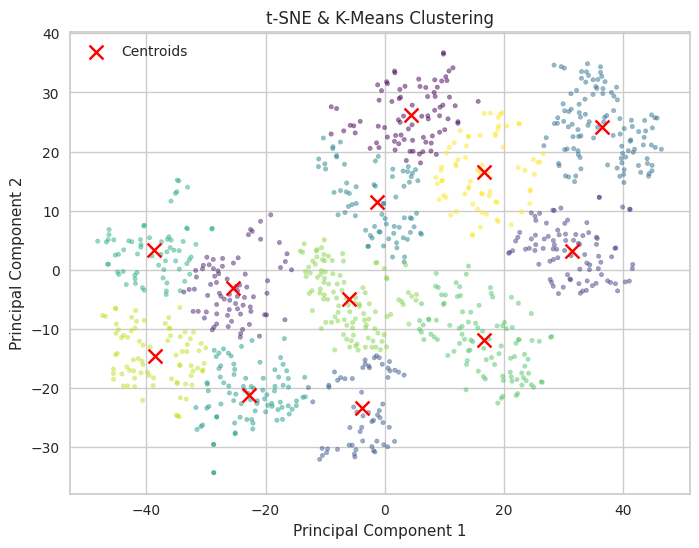

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_tsne.labels_, cmap='viridis', s=10, alpha=0.5)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], marker='x', c='red', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('t-SNE & K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()
#gave me a lower score!!

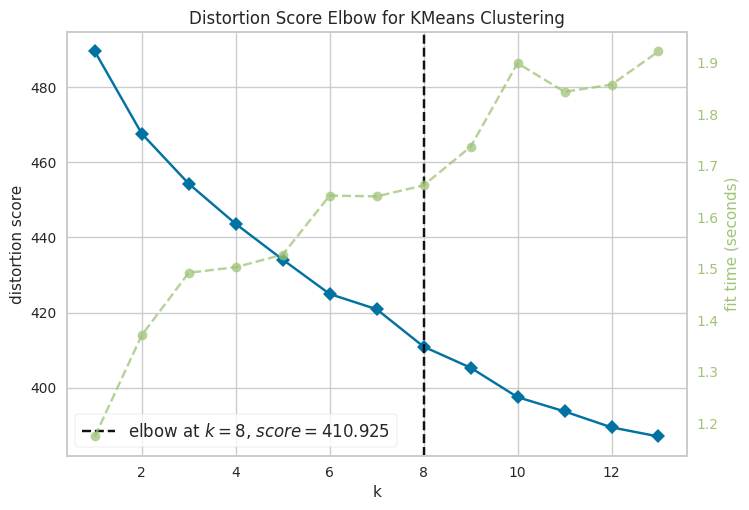

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer


kmeans_tsne = KMeans(n_init=10)

visualizer_tsne = KElbowVisualizer(kmeans_tsne, k=(1, 14))

visualizer_tsne.fit(data_competition)

visualizer_tsne.show()


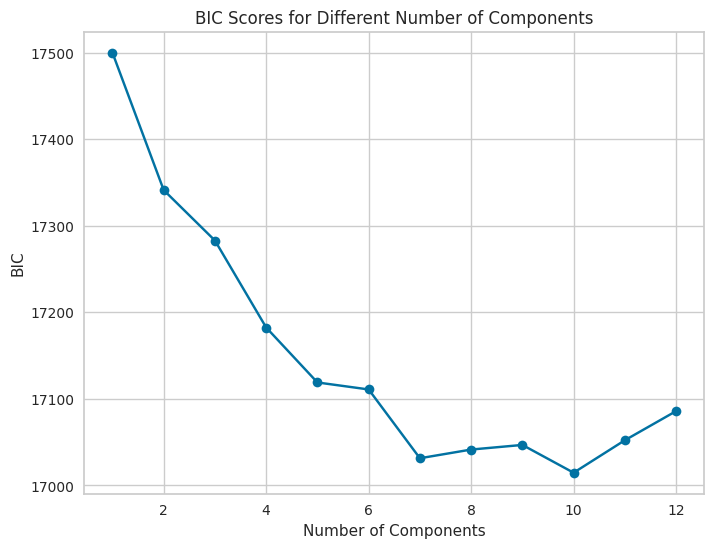

'*********************************'

In [23]:
from sklearn.mixture import GaussianMixture

n_components_range = np.arange(1, 13)

bic = []
lowest_bic = np.infty
best_gmm = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(data_reduced)
    bic_score = gmm.bic(data_reduced)
    bic.append(bic_score)
    if bic_score < lowest_bic:
        lowest_bic = bic_score
        best_gmm = gmm

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC Scores for Different Number of Components')
plt.show()

'''*********************************'''


In [24]:
labels = best_gmm.predict(data_reduced)


print("Cluster Labels:")
print(labels)


Cluster Labels:
[7 5 7 8 5 5 2 9 3 3 9 1 7 3 3 7 4 5 1 3 9 5 4 5 4 3 0 1 1 8 9 2 1 1 2 7 3
 7 7 1 9 7 8 2 9 0 3 2 1 1 2 3 7 2 5 7 9 3 1 7 7 7 1 5 0 3 8 3 7 3 3 2 0 4
 0 1 2 7 8 7 6 1 9 2 4 7 1 3 2 2 3 0 2 0 4 1 7 4 5 3 1 4 1 2 1 9 9 3 5 0 5
 5 4 2 5 8 1 6 7 3 8 1 1 0 7 0 1 0 0 5 8 7 6 0 7 9 2 3 8 3 7 5 3 1 6 1 5 6
 1 5 3 6 7 5 9 3 1 5 2 0 0 2 6 1 0 2 9 3 8 4 1 9 1 2 6 9 3 9 4 3 1 3 7 5 1
 7 3 1 5 0 7 7 2 5 3 5 5 7 3 4 5 0 0 5 5 8 8 4 1 7 2 2 3 2 3 2 0 0 7 3 9 7
 9 2 7 3 8 0 3 0 3 2 3 4 3 7 4 8 2 4 4 4 1 3 6 9 2 4 5 7 1 3 0 3 2 7 7 7 1
 8 5 4 2 4 5 3 0 5 9 2 0 4 5 5 1 4 5 8 9 5 2 7 0 2 3 5 5 4 5 0 9 1 5 2 4 7
 1 3 5 2 9 3 4 2 1 1 4 2 1 8 2 3 5 6 3 0 3 0 3 9 3 1 5 1 4 8 1 5 1 1 3 9 2
 3 3 7 1 9 2 1 7 4 7 8 5 3 0 3 3 2 3 1 0 5 4 4 1 5 8 1 7 4 0 3 8 4 5 6 1 2
 4 7 2 5 0 5 2 3 1 3 7 6 8 4 1 3 8 3 7 3 2 6 3 1 3 9 0 1 6 0 7 7 1 5 5 3 9
 0 8 1 4 9 5 4 3 1 9 0 5 0 8 3 0 2 7 9 7 6 2 2 2 3 4 5 0 5 8 1 4 2 3 2 0 3
 4 2 8 0 1 9 1 7 8 3 9 1 3 8 1 2 3 9 4 4 2 4 9 2 7 2 3 0 5 4 4 1 7 4 1 4 7
 3 1 1 7 

In [25]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

n_samples, n_features = 1000, 785
X = np.random.randn(n_samples, n_features)

n_components = 3
ipca = IncrementalPCA(n_components=n_components)

batch_size = 100
for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    ipca.partial_fit(X_batch)

principal_components = ipca.components_

X_transformed = ipca.transform(X)

print("Transformed Data:")
print(X_transformed)


Transformed Data:
[[-3.35044839  4.36018175  6.8052524 ]
 [-0.0450759  -2.87435661 -3.54125447]
 [-1.60741804  2.57161747  1.8644813 ]
 ...
 [ 1.62828182 -0.43407969  0.23398232]
 [ 3.13513681 -2.21615694 -1.1883179 ]
 [-2.18920597  1.3449279  -0.37515352]]


In [26]:
import pandas as pd


df_competition = pd.DataFrame(data_competition)



In [29]:
import pandas as pd


df_competition = pd.DataFrame(data_competition)

df_labels = pd.DataFrame({'label': labels})

_df = pd.concat([ID, df_labels], axis=1)

_df.to_csv('sample_submission.csv', index=False)